Tai Tony Tran
<br>7-30-22
<br>26.2 Data Anyalysis interview Challenge

### 1. Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import tree

### 2. Data Import and Initial Review

In [2]:
paths = os.path.split(os.getcwd())
file_path = paths[0] + '\\Data'

In [3]:
ultimate_data = pd.read_json(file_path+'\\ultimate_data_challenge.json')
logins = pd.read_json(file_path+'\\logins.json')

In [4]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
ultimate_data.shape

(50000, 12)

In [7]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [8]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [9]:
logins.shape

(93142, 1)

### 3. Exploratory Data Analysis for Logins

In [10]:
logins['date_only'] = logins['login_time'].dt.date

In [11]:
logins['time_only'] = logins['login_time'].dt.time

In [12]:
logins['month'] = logins['login_time'].dt.month

In [13]:
logins['hour'] = logins['login_time'].dt.hour

In [14]:
logins['weekday'] = logins['login_time'].dt.weekday

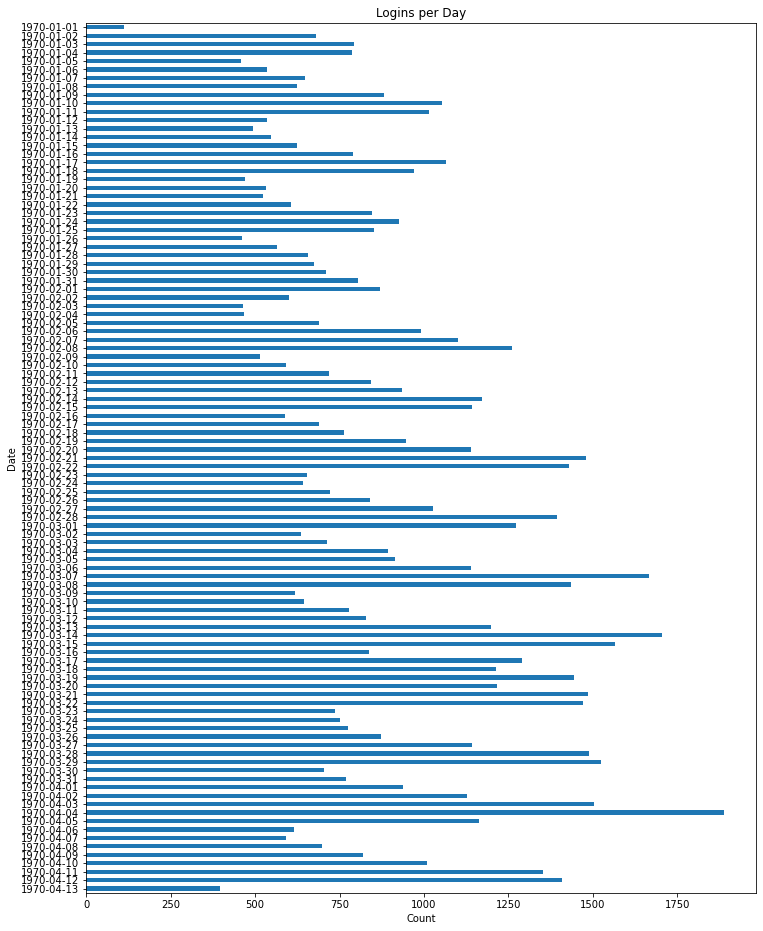

In [15]:
plt.subplots(figsize=(12,16))
logins['date_only'].value_counts().sort_index(axis=0, ascending=False).plot(kind='barh')
plt.title('Logins per Day')
plt.xlabel('Count')
plt.ylabel('Date')
plt.show()

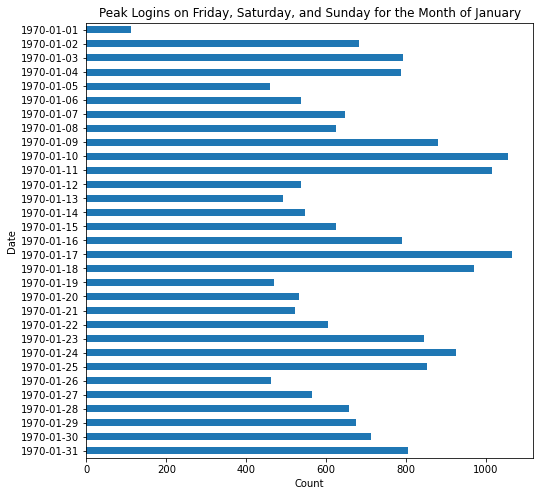

In [16]:
plt.subplots(figsize=(8,8))
logins[logins['month']==1]['date_only'].value_counts().sort_index(axis=0, ascending=False).plot(kind='barh')
plt.title('Peak Logins on Friday, Saturday, and Sunday for the Month of January')
plt.xlabel('Count')
plt.ylabel('Date')
plt.show()

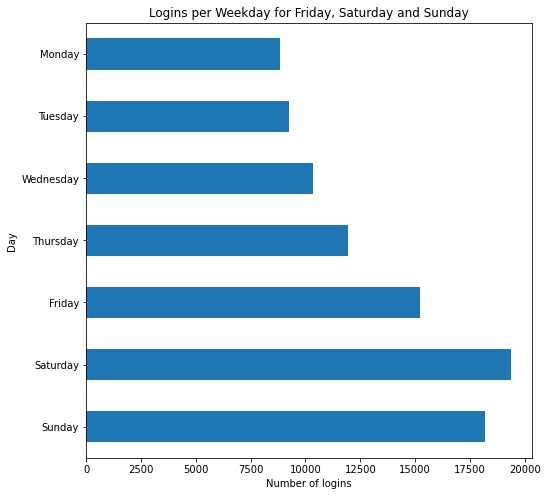

In [17]:
plt.subplots(figsize=(8,8))
ax = logins['weekday'].value_counts().sort_index(axis=0, ascending=False).plot(kind='barh')
plt.title("Logins per Weekday for Friday, Saturday and Sunday")
plt.ylabel("Day")
plt.xlabel("Number of logins")
ax.set_yticklabels([calendar.day_name[6-d] for d in range(7)])
plt.show()

Daily log in's tend to **peak on Friday, Saturday and Sundays** throughout the entire dataset. In the chart above, we can see that the log ins tend to peak at 7 day intervals, with the highest log ins on Fridays, Saturdays, and Sundays (for example, January 2 - 4, 1970).

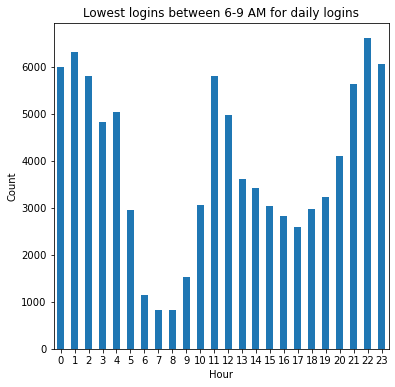

In [18]:
plt.subplots(figsize=(6,6))
logins['hour'].value_counts().sort_index(axis=0, ascending=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Lowest logins between 6-9 AM for daily logins')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

Login demand decreases and is at its **lowest between the hours of 6 AM - 9 AM.**

The login demand is at its **highest during lunch time (11 AM - 12 PM) and at night (9 PM - 4 AM)**

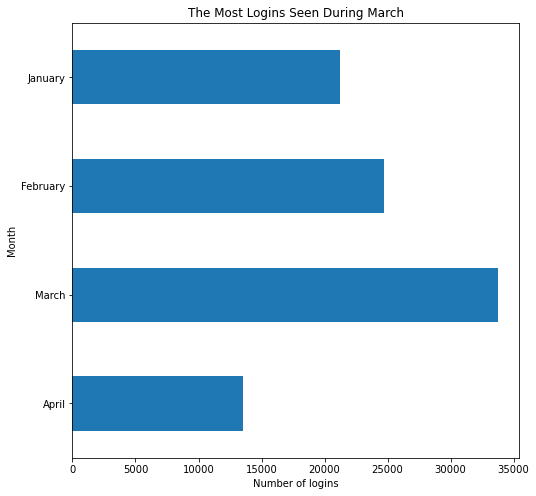

In [19]:
plt.subplots(figsize=(8,8))
ax = logins['month'].value_counts().sort_index(axis=0, ascending=False).plot(kind='barh')
plt.title("The Most Logins Seen During March")
plt.ylabel("Month")
plt.xlabel("Number of logins")
ax.set_yticklabels([calendar.month_name[4-d] for d in range(4)])
plt.show()

**The most logins were seen during the month of March.** The chart shows that April is the month with the lowest login count, however, that is due to incomplete data collected from the month of April.

### 4. Experiment and Metrics Design

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

<font color=red>
The key measure of success for this experiment is an significant amount of toll reimbursements going both ways between each city for driver partners. This can be measured by taking the amount of tolls that were reimbursed divided by the total number of reimbursed. I am choosing this metric because it would measure the percentage of driver partners that travel between the two cities compared to the total amount of other drivers who travel between the two cities. This percentage can be compared to a baseline, the percentage of driver partners who took the tolls between the two cities before the toll reimbursements to see if there is a significant increase.</font>

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    <br><tab>a. how you will implement the experiment
    <br><tab>b. what statistical test(s) you will conduct to verify the significance of the
observation
    <br><tab>c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
 
<font color=red>  
I would perform a paired T-test, collecting data of the percentage of driver partner tolls taken before reimbursement treatment and data of the percentage of driver partner tolls taken after. We will have two groups, one control with no reimbursement where we measure the number of driver partners traveling between cities normally and a test sample with the tolls reimbursed. The null hypothesis assumes that the true mean difference between the paired samples is zero, meaning that there will be no difference in the amount of driver partners that travel between cities before and after the treatment. We assume that all observable differences are explained by random variation. Our upper tailed alternative hypothesis assumes that the true mean difference between the control and test samples are greater than zero.

We calculate the p-value to test the significance of our test. Our null hypothesis (that there is no change after the toll reimbursement) is less probable if our p-value is below our chosen value of 0.05. With our collected data, we can provide insight into trends on what day and time most drivers commute to the other cities and can promote travel between cities by lowering toll costs for partners at specific times.</font>
    

### 5. Predicitive Modeling

#### 5.1 DataFrame cleaning

In [20]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [21]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
# Changing the column types of 'signup date' and 'last_trip_date' to be datetime dtypes

ultimate_data['signup_date'] = pd.to_datetime(ultimate_data['signup_date'])
ultimate_data['last_trip_date'] = pd.to_datetime(ultimate_data['last_trip_date'])
ultimate_data['delta_time'] = ultimate_data['last_trip_date'] - ultimate_data['signup_date']

In [23]:
# Creating the six_month_retention column, 1 means that they were active for more than 6 months, 0 means they were not

ultimate_data['six_month_retention'] = 0
index = ultimate_data[ultimate_data['delta_time'] >= datetime.timedelta(180)]['six_month_retention'].index
for x in index:
    ultimate_data.loc[x, 'six_month_retention'] = 1

In [24]:
# Chaning the boolean 'ultimate_black_user' col to a int column for machine learning
# 0 is False, 1 is True
ultimate_data['ultimate_black_user'] = ultimate_data['ultimate_black_user'].astype('int')

In [25]:
ultimate_data['ultimate_black_user'].value_counts()

0    31146
1    18854
Name: ultimate_black_user, dtype: int64

In [26]:
# Retention is considered 'active' if User has taken a trip in the preceding 30 days.
# Set target date as maximum date in dataset
# 1 is for 'Active' and 0 is for 'Nonactive'

max_date = ultimate_data['last_trip_date'].max()
max_date

Timestamp('2014-07-01 00:00:00')

In [27]:
ultimate_data['active_retention'] = 0
index = ultimate_data[max_date - ultimate_data['last_trip_date'] <= datetime.timedelta(30)]['active_retention'].index
for x in index:
    ultimate_data.loc[x, 'active_retention'] = 1

In [28]:
ultimate_data['active_retention'].value_counts()

0    31196
1    18804
Name: active_retention, dtype: int64

According to the data sample, about **37.6%** of riders are considered active, meaning that they have taken a ride in the past month from our set target date of 2014-07-01.

In [29]:
#Drop the datetime columns that are no longer useful

cleaned_data = ultimate_data.drop('signup_date', axis=1)
cleaned_data = cleaned_data.drop('last_trip_date', axis=1)

In [30]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   city                    50000 non-null  object         
 1   trips_in_first_30_days  50000 non-null  int64          
 2   avg_rating_of_driver    41878 non-null  float64        
 3   avg_surge               50000 non-null  float64        
 4   phone                   49604 non-null  object         
 5   surge_pct               50000 non-null  float64        
 6   ultimate_black_user     50000 non-null  int32          
 7   weekday_pct             50000 non-null  float64        
 8   avg_dist                50000 non-null  float64        
 9   avg_rating_by_driver    49799 non-null  float64        
 10  delta_time              50000 non-null  timedelta64[ns]
 11  six_month_retention     50000 non-null  int64          
 12  active_retention        50000 no

#### 5.2 Exploratory Data Analysis

We begin by exploring the numerical columns to see if there is any large positive or negative values related to our retention column.

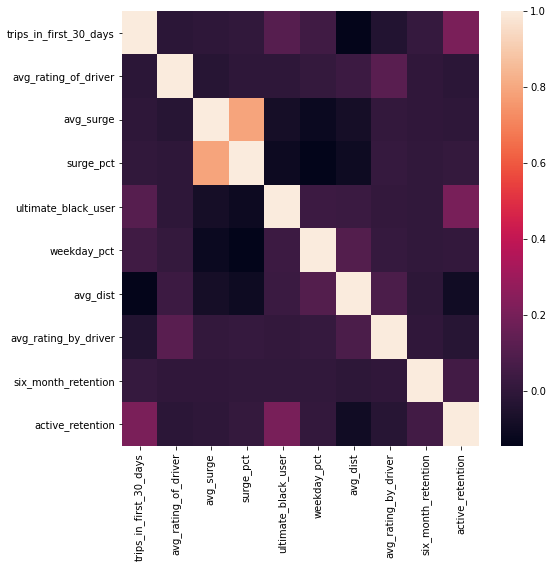

In [31]:
plt.subplots(figsize=(8,8))
sns.heatmap(cleaned_data.corr());

We see a slightly positive correlations with 'trips_in_first_30_days' and 'ultimate_black_user'. We also see a more negative correlation with 'avg_dist'.

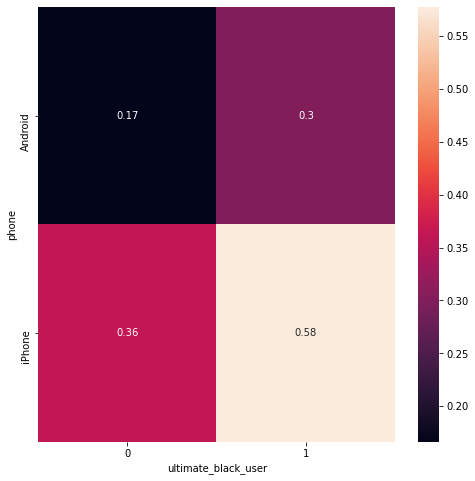

In [32]:
df_heatmap = cleaned_data.pivot_table(values='active_retention',index='phone',
                                     columns=['ultimate_black_user'])

plt.subplots(figsize=(8,8))
sns.heatmap(df_heatmap,annot=True)
plt.show()

When checking the correlations of our categorical column for phones, we do see that iphone users tend to have a higher active rention rate compared to their android counterparts.

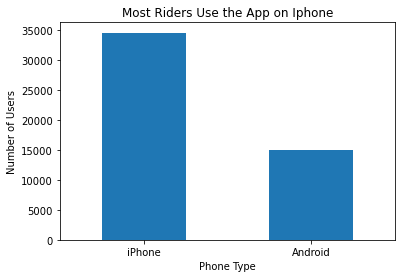

In [33]:
cleaned_data['phone'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Most Riders Use the App on Iphone')
plt.ylabel('Number of Users')
plt.xlabel('Phone Type')
plt.show()

In [34]:
cleaned_data.groupby('phone')['ultimate_black_user'].value_counts()

phone    ultimate_black_user
Android  0                      10200
         1                       4822
iPhone   0                      20792
         1                      13790
Name: ultimate_black_user, dtype: int64

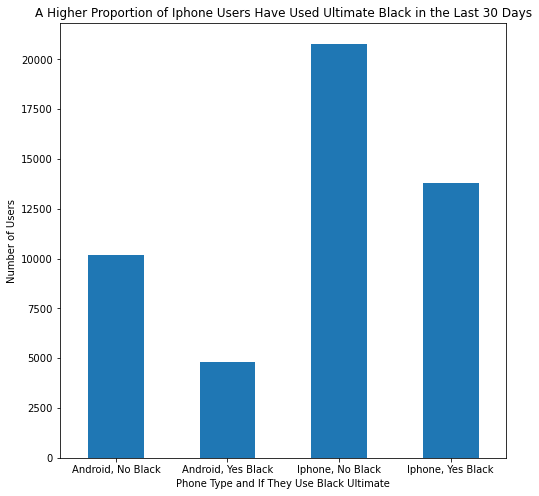

In [35]:
plt.subplots(figsize = (8,8))
ax = cleaned_data.groupby('phone')['ultimate_black_user'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('A Higher Proportion of Iphone Users Have Used Ultimate Black in the Last 30 Days')
plt.ylabel('Number of Users')
plt.xlabel('Phone Type and If They Use Black Ultimate')
ax.set_xticklabels(['Android, No Black', 'Android, Yes Black', 'Iphone, No Black', 'Iphone, Yes Black'])
plt.show()

We also see that more users are NOT black ultimate users in the past 30 days, and that there are also more total iphone users than android users.

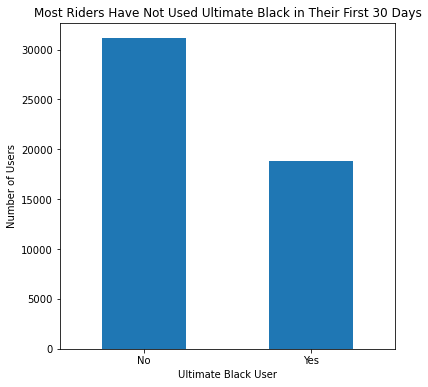

In [36]:
plt.subplots(figsize=(6,6))
ax = cleaned_data['ultimate_black_user'].value_counts().plot(kind='bar')
ax.set_xticklabels(['No', 'Yes'])
plt.xticks(rotation=0)
plt.title('Most Riders Have Not Used Ultimate Black in Their First 30 Days')
plt.ylabel('Number of Users')
plt.xlabel('Ultimate Black User')
plt.show()

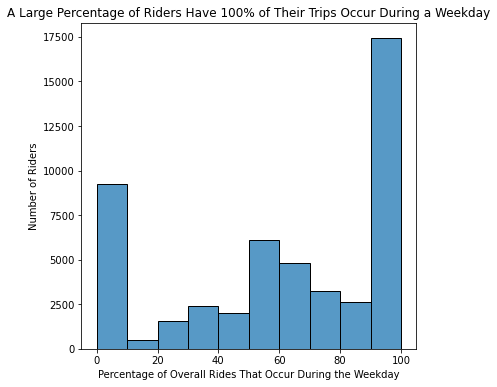

In [37]:
plt.subplots(figsize=(6,6))
sns.histplot(data=cleaned_data, x='weekday_pct', bins=10)
plt.title('A Large Percentage of Riders Have 100% of Their Trips Occur During a Weekday')
plt.xlabel('Percentage of Overall Rides That Occur During the Weekday')
plt.ylabel('Number of Riders')
plt.show()

A large percentage of riders have 90-100% of their trips occur during a weekday. Approximately 1/5 of the sample does not have any trips or less than 10% of their trips occur on weekdays.

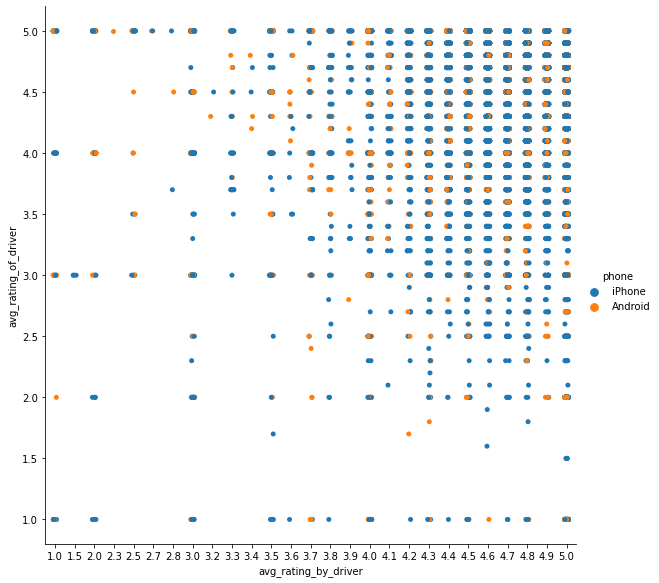

In [38]:
ax = sns.catplot(data=cleaned_data, x='avg_rating_by_driver', y='avg_rating_of_driver', hue='phone', height=8)

No correlation can be seen comparing the avg rating of a driver with the average rating given by a driver.

In [39]:
#ax = sns.catplot(data=cleaned_data, x='surge_pct', y='avg_surge', hue='phone', height=8)

### 5.3 Modeling

Our target variable is the categorical active rentention, which has a 1 for an active customer that has taken a ride at least 1 month preceding our target date of 2014-07-01. A designation of 0 is for inactive customers. 

We begin by selecting our columns that will be trained into our model. From the correlation heatmap, we saw that the numerical columns of 'trips_in_first_30_days', 'ultimate_black_user', 'avg_dist' have a stronger positive or negative correlation value. The next correlation heatmap shows some positive correlation with 'phone' type, showing that iphones tend to have a higher active retention correlation.

We use these columns to train our baseline, a simple decision tree classifier.

In [40]:
cleaned_data.columns

Index(['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'delta_time', 'six_month_retention',
       'active_retention'],
      dtype='object')

In [41]:
X = cleaned_data.drop('active_retention', axis=1)
y = cleaned_data.active_retention
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
basic_features = ['trips_in_first_30_days', 'phone', 'ultimate_black_user', 'avg_dist']

simple_tree = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    tree.DecisionTreeClassifier()
)
simple_tree.fit(X_train[basic_features], y_train)

y_pred = simple_tree.predict(X_test[basic_features])

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.65416

In [43]:
y_pred_proba = simple_tree.predict_proba(X_test[basic_features])[::,1]
fpr, tpr, thresholds  = roc_curve(y_test,  y_pred_proba)
AUC = roc_auc_score(y_test, y_pred_proba)

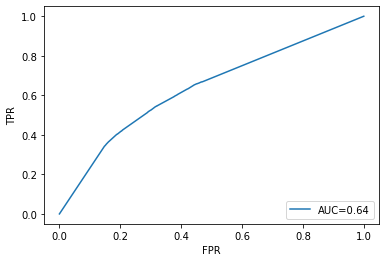

In [44]:
plt.plot(fpr,tpr, label="AUC="+str(round(AUC,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

**The AUC value of 0.63 shows a poor ability of the model to distinguish between True Positive and False Positive Rates.**

However, the tree classifier does distinguish TPR from FPR better than a random model would (AUC = 0.5)

This accuracy of 0.65 and AUC of 0.63 will be considered our baseline for future models that we will try to improve on.

The next model I tried was a Random Forest Classifier.

In [45]:
cols = ['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'six_month_retention']

random_forest = Pipeline(
                    [('Encoder', OneHotEncoder(handle_unknown='ignore')),
                     ('classifier',RandomForestClassifier())]
)
random_forest.fit(X_train[cols], y_train)

y_pred2 = random_forest.predict(X_test[cols])

accuracy2 = accuracy_score(y_test, y_pred2)
accuracy2

0.78544

In [46]:
y_pred_proba2 = random_forest.predict_proba(X_test[cols])[::,1]
fpr2, tpr2, thresholds  = roc_curve(y_test,  y_pred_proba2)
AUC = roc_auc_score(y_test, y_pred_proba2)

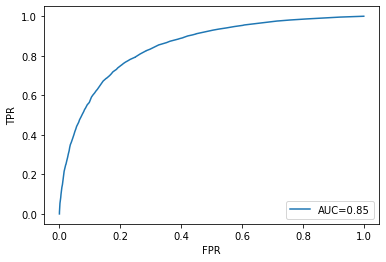

In [47]:
plt.plot(fpr2,tpr2, label="AUC="+str(round(AUC,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

In [55]:
feature_names = random_forest.named_steps["Encoder"].get_feature_names()
coefs = random_forest.named_steps["classifier"].feature_importances_.flatten()
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

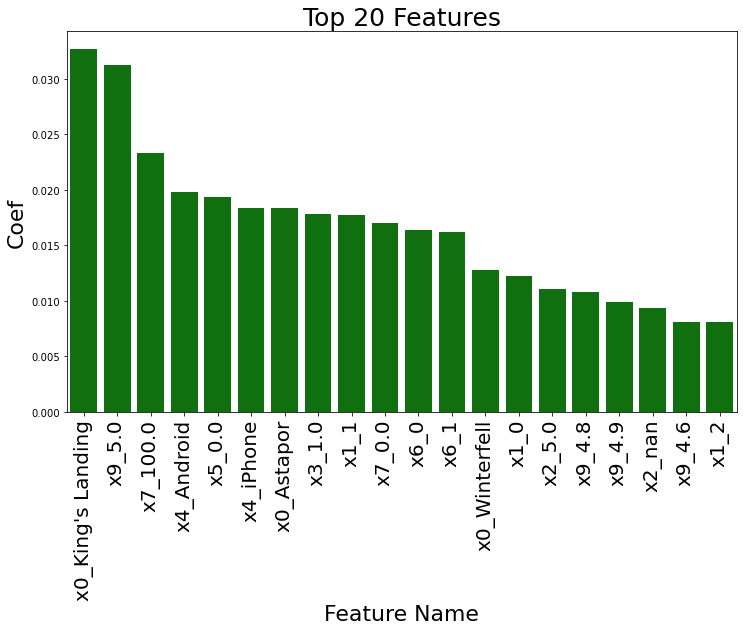

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

**This model has an accuracy of 0.78 and an AUC of 0.85, much better than our baseline.**

This Random Forest Classifier has a much better ability to distinguish between True Positive Rates and False Positive Rates.

From the chart, we can also see that the City of King's Landing was the most important feature to our model, followed by the 'avg rating for drivers', followed by the weekday_pct.

### 5.4 Six Month Retention Predictions

In [57]:
X = cleaned_data.drop('six_month_retention', axis=1)
y = cleaned_data.six_month_retention
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [58]:
basic_features = ['trips_in_first_30_days', 'phone', 'ultimate_black_user', 'avg_dist']

simple_tree_six_month = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    tree.DecisionTreeClassifier()
)
simple_tree_six_month.fit(X_train[basic_features], y_train)

y_pred3 = simple_tree_six_month.predict(X_test[basic_features])

accuracy3 = accuracy_score(y_test, y_pred3)
accuracy3


0.99856

In [59]:
y_pred_proba3 = simple_tree_six_month.predict_proba(X_test[basic_features])[::,1]
fpr3, tpr3, thresholds  = roc_curve(y_test,  y_pred_proba3)
AUC = roc_auc_score(y_test, y_pred_proba3)

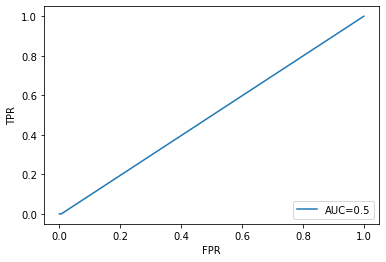

In [60]:
plt.plot(fpr3,tpr3, label="AUC="+str(round(AUC,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

**The simple decision tree classifier model for 6 month retention has an AUC of 0.5, meaning it does not predict better than predictions due to random chance.**

In [70]:
cols = ['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active_retention']

random_forest_6_month = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    RandomForestClassifier()
)
random_forest_6_month.fit(X_train[cols], y_train)

y_pred4 = random_forest_6_month.predict(X_test[cols])

accuracy4 = accuracy_score(y_test, y_pred4)
accuracy4

0.99872

In [71]:
y_pred_proba4 = random_forest_6_month.predict_proba(X_test[cols])[::,1]
fpr4, tpr4, thresholds  = roc_curve(y_test,  y_pred_proba4)
AUC = roc_auc_score(y_test, y_pred_proba4)

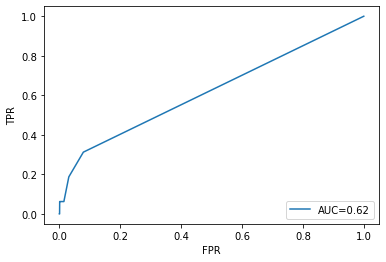

In [72]:
plt.plot(fpr4,tpr4, label="AUC="+str(round(AUC,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

Our Random Forest Classifier model for 6 month retention increases upon the prediction power of the decision tree classifier model and can predict better than predictions due to random chance, however, it is still poorly identifies True Positive values from False Positive Values.

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gb_6_month = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    GradientBoostingClassifier()
)
gb_6_month.fit(X_train[cols], y_train)

y_pred5 = gb_6_month.predict(X_test[cols])

accuracy5 = accuracy_score(y_test, y_pred5)
accuracy5

0.998

In [65]:
y_pred_proba5 = gb_6_month.predict_proba(X_test[cols])[::,1]
fpr5, tpr5, thresholds  = roc_curve(y_test,  y_pred_proba5)
AUC = roc_auc_score(y_test, y_pred_proba5)

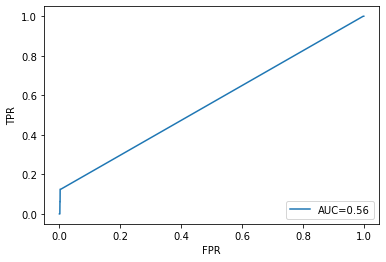

In [66]:
plt.plot(fpr5,tpr5, label="AUC="+str(round(AUC,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

The gradient boosting classifier predicts True Value Rates at a worse rate than our Random Forest Classifier and has a lower accuracy and AUC value.

### 6. Summary

From the models provided, Ultimate can see that the models poorly predict long term retention for Ultimate riders. More data would need to be collected to improve the model's accuracy. 

From the short term active retention model, we can gain quite a few insights on what affects active retention. Short term active retention is primarily affected by features such as:
1. the number of trips they took in the first 30 days after signing up (the higher the more likely classified as 'active')
2. whether they took an ultimate black in their first 30 days (if yes, then more likely classified as 'active')
3. driver rating (the higher the more likely classified as 'active')
4. city (Users in King's Landing tend to have a higher retention)

To continue improving rentention rates, Ultimate can focus targeting the features above, looking to promote to customers that meet these criteria and focusing on ways to improve driver ratings, such as more customer relation training.